### Hierarchial Clustering

In this template I aim to find the natural groupings of the customers of a mall based on their annual income and spending score. 

We are using clustering method because we don't have any idea about the segments of customers. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('Mall_Customers.csv') 

In [5]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
X = dataset.iloc[:, [3,4]].values

#### Dendogram to determine the optimal number of clusters

**Scipy** is an open source library containing the tools for hierarchial clustering and dendograms.

We use the **Linkage method** for Hierarchial Clustering. 

**ward** is a method that tries to minimize the variance in each cluster

**Note** : 

in **KMeans** we minimize the within cluster sum of squares **(WSCC)**

in **clustering** we minimize the within cluster **variance** 


In [7]:
import scipy.cluster.hierarchy as sch

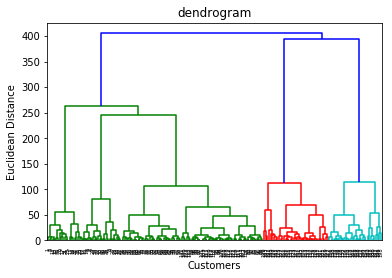

In [8]:
dendrogram=sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In the dendrogram we have to find the largest vertical line that does not cross any horizontal line. 

Here the area that holds the threshold is on the blue lines,  from the green horizontal line to red and blue. Is the highest distance that does not cross any horizontal line. If we put our threshold there we can see that it cross out 5 vertical lines. So we now know that the optimal number of clusters are five. 

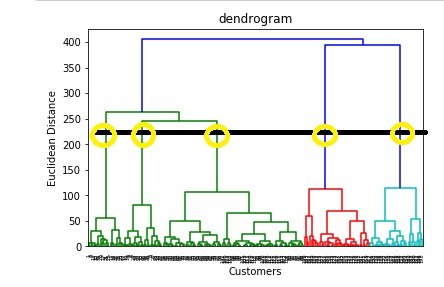

### Applying the hierarchial clustering to the mall dataset 


In [9]:
from sklearn.cluster import AgglomerativeClustering
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc=hc.fit_predict(X)

About **AgglomerativeClustering** 

**n_clusters** for number of clusters

**affinity** is the distance to do the linkage

We are not using the fit method but we use the **fit_predict method**, that for each observation it returns the cluster it belongs to. 

that means for every single client of our data set the fit method is going to give us the cluster to which client belongs and it will retun its cluster number into a single vector that we are going to call y_hc.


### visualizing the clusters

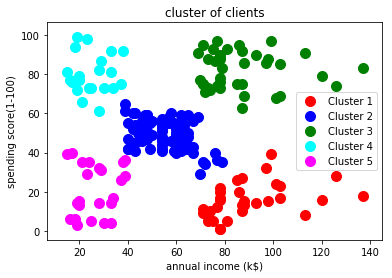

In [12]:
plt.scatter(X[y_hc==0, 0],X[y_hc==0, 1], s=100, c='red',label='Cluster 1')
plt.scatter(X[y_hc==1, 0],X[y_hc==1, 1], s=100, c='blue',label='Cluster 2')
plt.scatter(X[y_hc==2, 0],X[y_hc==2, 1], s=100, c='green',label='Cluster 3')
plt.scatter(X[y_hc==3, 0],X[y_hc==3, 1], s=100, c='cyan',label='Cluster 4')
plt.scatter(X[y_hc==4, 0],X[y_hc==4, 1], s=100, c='magenta',label='Cluster 5')
plt.title('cluster of clients')
plt.xlabel('annual income (k$)')
plt.ylabel('spending score(1-100)')
plt.legend()
plt.show()

We start with plotting all the observations belongigng to cluster one y_hc==0 

and we specify that we want the first columns of our data X by 0 ( becuase index at python starts at 0 ). And by that we gave the all observations of the x that belongs to cluster one. and we have to do the same for y coordinates. 
second columns of our data X is gonna be the Y coordinate. 

s is for size of the data points

c is color of the cluster

#### plot interpretation
We can see that cluster 1 are careful. Don't spend that much even they earn alot.

cluster 2 are standard (around the mean) average income average & spending score

cluster 3 are **target** high income and high spending score

cluster 4 (low income and spend much) careless 

cluster 5 sensible clients as opposed to careless clients
